In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Let's load the data and look at them
df= pd.read_csv('hellonew.csv', names=['Smiles', 'Target'])
df.head()

Smiles     Target
0  [Na+].[Na+].O(C1C(OC2C(C)C(OC)C(OC)OC2COC)OC(O...  64.516129
1  CC(CC(CC(CC)C(=O)[O-])OC(=O)C(CC(C)O)CC(CC)C(=...  32.512773
2  C1C(O)CC(O)CC(C)OC(=O)C(CC)CC(C(=O)O)CC(C(=O)O...  63.136062
3  C(C1C2OC(=O)C(CC)CC3CC4CC5CC(CC(CC)C(=O)OC6C(C...  86.000000
4  OC(=O)COC1C(OC2C(COC)OC(OC)C(OC=O)C2OC)OC(COC)...  76.000000

In [3]:
#Importing Chem module
from rdkit import Chem

#Method transforms smiles strings to mol rdkit object
df['mol'] = df['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))

#Now let's see what we've got
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


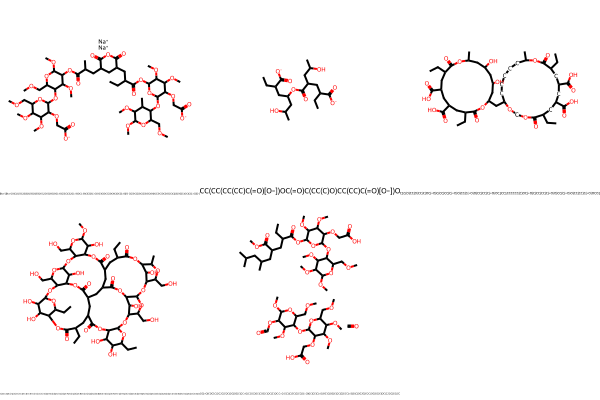

In [4]:
from rdkit.Chem import Draw
mols = df['mol'][:5]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=3, useSVG=True, legends=list(df['Smiles'][:20].values))

In [5]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1
from rdkit import Chem
from rdkit.Chem import Descriptors

df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))


# Calculate descriptors for each molecule
df['NHOHCount'] = df['mol'].apply(lambda x: Descriptors.NHOHCount(x))
df['NOCount'] = df['mol'].apply(lambda x: Descriptors.NOCount(x))
df['NumAliphaticCarbocycles'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticCarbocycles(x))
df['NumAliphaticHeterocycles'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticHeterocycles(x))
df['NumAliphaticRings'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticRings(x))
df['NumAromaticCarbocycles'] = df['mol'].apply(lambda x: Descriptors.NumAromaticCarbocycles(x))
df['NumAromaticHeterocycles'] = df['mol'].apply(lambda x: Descriptors.NumAromaticHeterocycles(x))
df['NumAromaticRings'] = df['mol'].apply(lambda x: Descriptors.NumAromaticRings(x))
df['NumHAcceptors'] = df['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))
df['NumHDonors'] = df['mol'].apply(lambda x: Descriptors.NumHDonors(x))
df['NumHeteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
df['NumRadicalElectrons'] = df['mol'].apply(lambda x: Descriptors.NumRadicalElectrons(x))
df['NumSaturatedHeterocycles'] = df['mol'].apply(lambda x: Descriptors.NumSaturatedHeterocycles(x))
df['NumSaturatedCarbocycles'] = df['mol'].apply(lambda x: Descriptors.NumSaturatedCarbocycles(x))
df['NumRotatableBonds'] = df['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df['NumValenceElectrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['NumSaturatedRings'] = df['mol'].apply(lambda x: Descriptors.NumSaturatedRings(x))
df['FractionCSP3'] = df['mol'].apply(lambda x: Descriptors.FractionCSP3(x))
df['MolWt'] = df['mol'].apply(lambda x: Descriptors.MolWt(x))
df['ExactMolWt'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['RingCount'] = df['mol'].apply(lambda x: Descriptors.RingCount(x))
df['TPSA'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['fr_Al_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Al_COO(x))
df['fr_Al_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Al_OH(x))
df['fr_Al_OH_noTert'] = df['mol'].apply(lambda x: Descriptors.fr_Al_OH_noTert(x))
df['fr_ArN'] = df['mol'].apply(lambda x: Descriptors.fr_ArN(x))
df['fr_Ar_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_COO(x))
df['fr_Ar_N'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_N(x))
df['fr_Ar_NH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_NH(x))
df['fr_Ar_OH'] = df['mol'].apply(lambda x: Descriptors.fr_Ar_OH(x))
df['fr_COO'] = df['mol'].apply(lambda x: Descriptors.fr_COO(x))
df['fr_COO2'] = df['mol'].apply(lambda x: Descriptors.fr_COO2(x))
df['fr_C_O'] = df['mol'].apply(lambda x: Descriptors.fr_C_O(x))
df['fr_C_O_noCOO'] = df['mol'].apply(lambda x: Descriptors.fr_C_O_noCOO(x))
df['fr_C_S'] = df['mol'].apply(lambda x: Descriptors.fr_C_S(x))
df['fr_HOCCN'] = df['mol'].apply(lambda x: Descriptors.fr_HOCCN(x))
df['fr_Imine'] = df['mol'].apply(lambda x: Descriptors.fr_Imine(x))
df['fr_NH0'] = df['mol'].apply(lambda x: Descriptors.fr_NH0(x))
df['fr_NH1'] = df['mol'].apply(lambda x: Descriptors.fr_NH1(x))
df['fr_NH2'] = df['mol'].apply(lambda x: Descriptors.fr_NH2(x))
df['fr_N_O'] = df['mol'].apply(lambda x: Descriptors.fr_N_O(x))
df['fr_Ndealkylation1'] = df['mol'].apply(lambda x: Descriptors.fr_Ndealkylation1(x))
df['fr_Ndealkylation2'] = df['mol'].apply(lambda x: Descriptors.fr_Ndealkylation2(x))
df['fr_Nhpyrrole'] = df['mol'].apply(lambda x: Descriptors.fr_Nhpyrrole(x))
df['fr_SH'] = df['mol'].apply(lambda x: Descriptors.fr_SH(x))
df['fr_aldehyde'] = df['mol'].apply(lambda x: Descriptors.fr_aldehyde(x))
df['fr_alkyl_carbamate'] = df['mol'].apply(lambda x: Descriptors.fr_alkyl_carbamate(x))
df['fr_alkyl_halide'] = df['mol'].apply(lambda x: Descriptors.fr_alkyl_halide(x))
df['fr_allylic_oxid'] = df['mol'].apply(lambda x: Descriptors.fr_allylic_oxid(x))
df['fr_amide'] = df['mol'].apply(lambda x: Descriptors.fr_amide(x))
df['fr_amidine'] = df['mol'].apply(lambda x: Descriptors.fr_amidine(x))
df['fr_aniline'] = df['mol'].apply(lambda x: Descriptors.fr_aniline(x))
df['fr_aryl_methyl'] = df['mol'].apply(lambda x: Descriptors.fr_aryl_methyl(x))
df['fr_azide'] = df['mol'].apply(lambda x: Descriptors.fr_azide(x))
df['fr_azo'] = df['mol'].apply(lambda x: Descriptors.fr_azo(x))
df['fr_barbitur'] = df['mol'].apply(lambda x: Descriptors.fr_barbitur(x))
df['fr_benzene'] = df['mol'].apply(lambda x: Descriptors.fr_benzene(x))
df['fr_benzodiazepine'] = df['mol'].apply(lambda x: Descriptors.fr_benzodiazepine(x))
df['fr_bicyclic'] = df['mol'].apply(lambda x: Descriptors.fr_bicyclic(x))
df['fr_diazo'] = df['mol'].apply(lambda x: Descriptors.fr_diazo(x))
df['fr_dihydropyridine'] = df['mol'].apply(lambda x: Descriptors.fr_dihydropyridine(x))
df['fr_epoxide'] = df['mol'].apply(lambda x: Descriptors.fr_epoxide(x))
df['fr_ester'] = df['mol'].apply(lambda x: Descriptors.fr_ester(x))
df['fr_ether'] = df['mol'].apply(lambda x: Descriptors.fr_ether(x))
df['fr_furan'] = df['mol'].apply(lambda x: Descriptors.fr_furan(x))
df['fr_guanido'] = df['mol'].apply(lambda x: Descriptors.fr_guanido(x))
df['fr_halogen'] = df['mol'].apply(lambda x: Descriptors.fr_halogen(x))
df['fr_hdrzine'] = df['mol'].apply(lambda x: Descriptors.fr_hdrzine(x))
df['fr_hdrzone'] = df['mol'].apply(lambda x: Descriptors.fr_hdrzone(x))
df['fr_imidazole'] = df['mol'].apply(lambda x: Descriptors.fr_imidazole(x))
df['fr_imide'] = df['mol'].apply(lambda x: Descriptors.fr_imide(x))
df['fr_isocyan'] = df['mol'].apply(lambda x: Descriptors.fr_isocyan(x))
df['fr_isothiocyan'] = df['mol'].apply(lambda x: Descriptors.fr_isothiocyan(x))
df['fr_ketone'] = df['mol'].apply(lambda x: Descriptors.fr_ketone(x))
df['fr_ketone_Topliss'] = df['mol'].apply(lambda x: Descriptors.fr_ketone_Topliss(x))
df['fr_lactam'] = df['mol'].apply(lambda x: Descriptors.fr_lactam(x))
df['fr_lactone'] = df['mol'].apply(lambda x: Descriptors.fr_lactone(x))
df['fr_methoxy'] = df['mol'].apply(lambda x: Descriptors.fr_methoxy(x))
df['fr_morpholine'] = df['mol'].apply(lambda x: Descriptors.fr_morpholine(x))
df['fr_nitrile'] = df['mol'].apply(lambda x: Descriptors.fr_nitrile(x))
df['fr_nitro'] = df['mol'].apply(lambda x: Descriptors.fr_nitro(x))
df['fr_nitro_arom'] = df['mol'].apply(lambda x: Descriptors.fr_nitro_arom(x))
df['fr_nitro_arom_nonortho'] = df['mol'].apply(lambda x: Descriptors.fr_nitro_arom_nonortho(x))
df['fr_nitroso'] = df['mol'].apply(lambda x: Descriptors.fr_nitroso(x))
df['fr_oxazole'] = df['mol'].apply(lambda x: Descriptors.fr_oxazole(x))
df['fr_oxime'] = df['mol'].apply(lambda x: Descriptors.fr_oxime(x))
df['fr_para_hydroxylation'] = df['mol'].apply(lambda x: Descriptors.fr_para_hydroxylation(x))
df['fr_phenol'] = df['mol'].apply(lambda x: Descriptors.fr_phenol(x))
df['fr_phenol_noOrthoHbond'] = df['mol'].apply(lambda x: Descriptors.fr_phenol_noOrthoHbond(x))
df['fr_phos_acid'] = df['mol'].apply(lambda x: Descriptors.fr_phos_acid(x))
df['fr_phos_ester'] = df['mol'].apply(lambda x: Descriptors.fr_phos_ester(x))
df['fr_piperdine'] = df['mol'].apply(lambda x: Descriptors.fr_piperdine(x))
df['fr_piperzine'] = df['mol'].apply(lambda x: Descriptors.fr_piperzine(x))
df['fr_priamide'] = df['mol'].apply(lambda x: Descriptors.fr_priamide(x))
df['fr_prisulfonamd'] = df['mol'].apply(lambda x: Descriptors.fr_prisulfonamd(x))
df['fr_pyridine'] = df['mol'].apply(lambda x: Descriptors.fr_pyridine(x))
df['fr_quatN'] = df['mol'].apply(lambda x: Descriptors.fr_quatN(x))
df['fr_sulfide'] = df['mol'].apply(lambda x: Descriptors.fr_sulfide(x))
df['fr_sulfonamd'] = df['mol'].apply(lambda x: Descriptors.fr_sulfonamd(x))
df['fr_sulfone'] = df['mol'].apply(lambda x: Descriptors.fr_sulfone(x))
df['fr_term_acetylene'] = df['mol'].apply(lambda x: Descriptors.fr_term_acetylene(x))
df['fr_tetrazole'] = df['mol'].apply(lambda x: Descriptors.fr_tetrazole(x))
df['fr_thiazole'] = df['mol'].apply(lambda x: Descriptors.fr_thiazole(x))
df['fr_thiocyan'] = df['mol'].apply(lambda x: Descriptors.fr_thiocyan(x))
df['fr_thiophene'] = df['mol'].apply(lambda x: Descriptors.fr_thiophene(x))
df['fr_unbrch_alkane'] = df['mol'].apply(lambda x: Descriptors.fr_unbrch_alkane(x))
df['fr_urea'] = df['mol'].apply(lambda x: Descriptors.fr_urea(x))
df['MinPartialCharge'] = df['mol'].apply(lambda x: Descriptors.MinPartialCharge(x))
df['MinAbsPartialCharge'] = df['mol'].apply(lambda x: Descriptors.MinAbsPartialCharge(x))
df['MaxPartialCharge'] = df['mol'].apply(lambda x: Descriptors.MaxPartialCharge(x))
df['MaxAbsPartialCharge'] = df['mol'].apply(lambda x: Descriptors.MaxAbsPartialCharge(x))
df.shape

(80, 114)

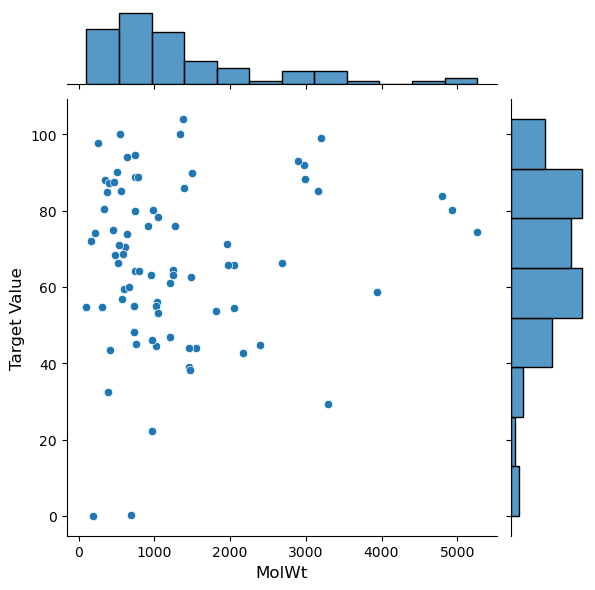

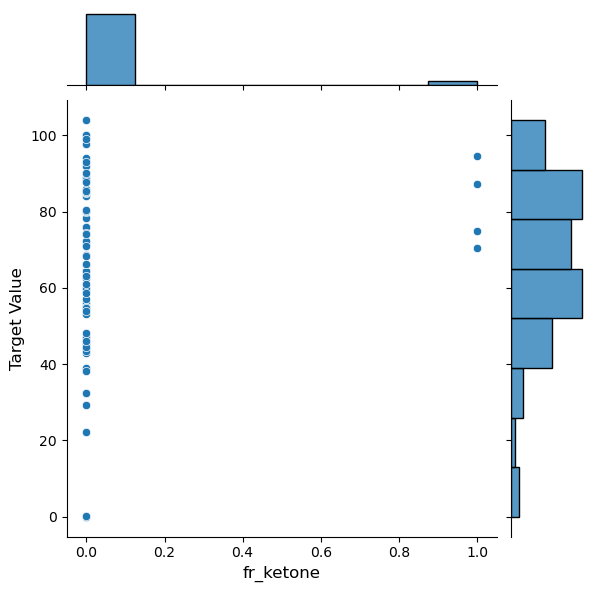

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the joint plot
joint_plot = sns.jointplot(x=df.MolWt, y=df.Target)

# Customize the plot
joint_plot.set_axis_labels('MolWt', 'Target Value')
joint_plot.ax_joint.set_xlabel('MolWt', fontsize=12)
joint_plot.ax_joint.set_ylabel('Target Value', fontsize=12)
joint_plot.ax_marg_x.set_xlabel('MolWt', fontsize=10)
joint_plot.ax_marg_y.set_ylabel('Density', fontsize=10)

# Create the joint plot
joint_plot = sns.jointplot(x=df.fr_ketone, y=df.Target)

# Customize the plot
joint_plot.set_axis_labels('fr_ketone', 'Target Value')
joint_plot.ax_joint.set_xlabel('fr_ketone', fontsize=12)
joint_plot.ax_joint.set_ylabel('Target Value', fontsize=12)
joint_plot.ax_marg_x.set_xlabel('fr_ketone', fontsize=10)
joint_plot.ax_marg_y.set_ylabel('Density', fontsize=10)

# Show the plot
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# load data into pandas dataframe
df = pd.DataFrame(df)

# Get the shape of the dataframe before deleting zero columns
shape_before = df.shape

# Identify columns with all zeros
zero_columns = df.columns[df.eq(0).all()]

# Delete zero columns from the dataframe
df = df.drop(zero_columns, axis=1)

# Get the shape of the dataframe after deleting zero columns
shape_after = df.shape

print("Shape before:", shape_before)
print("Shape after:", shape_after)

Shape before: (80, 114)
Shape after: (80, 79)


In [8]:
# Delete columns with null values
df = df.dropna(axis=1)

# Verify if null values are deleted
null_values = df.isnull().sum()
total_null_values = null_values.sum()

# Check if any null values exist in the DataFrame
if total_null_values > 0:
    print("Null values still exist in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

df.shape


No null values found in the DataFrame.


(80, 75)

In [9]:
# Drop a single column from the DataFrame
df = df.drop('mol', axis=1)

# Verify if the column is dropped
print("Column 'mol' is dropped from the DataFrame.")

# Drop a single column from the DataFrame
df = df.drop('Smiles', axis=1)

# Verify if the column is dropped
print("Column 'Smiles' is dropped from the DataFrame.")

df.shape

Column 'mol' is dropped from the DataFrame.
Column 'Smiles' is dropped from the DataFrame.


(80, 73)

In [10]:
df.head()

Target  NHOHCount  NOCount  NumAliphaticCarbocycles  \
0  64.516129          0       30                        0   
1  32.512773          2        8                        0   
2  63.136062          6       19                        0   
3  86.000000         12       35                        0   
4  76.000000          2       31                        0   

   NumAliphaticHeterocycles  NumAliphaticRings  NumAromaticCarbocycles  \
0                         5                  5                       0   
1                         0                  0                       0   
2                         2                  2                       0   
3                        11                 11                       0   
4                         4                  4                       0   

   NumAromaticHeterocycles  NumAromaticRings  NumHAcceptors  ...  \
0                        0                 0             30  ...   
1                        0                 0              8  ...   
2                        0                 0             19  ...   
3                        0                 0             35  ...   
4                        0                 0             31  ...   

   fr_phenol_noOrthoHbond  fr_phos_acid  fr_phos_ester  fr_priamide  \
0                       0             0              0            0   
1                       0             0              0            0   
2                       0             0              0            0   
3                       0             0              0            0   
4                       0             0              0            0   

   fr_pyridine  fr_quatN  fr_sulfide  fr_sulfone  fr_thiophene  fr_urea  
0            0         0           0           0             0        0  
1            0         0           0           0             0        0  
2            0         0           0           0             0        0  
3            0         0           0           0             0        0  
4            0         0           0           0             0        0  

[5 rows x 73 columns]

Original Target:
Minimum value: 0.0
Maximum value: 104.0

Scaled Target:
Minimum value: -3.1155659411389545
Maximum value: 1.7254829867237198


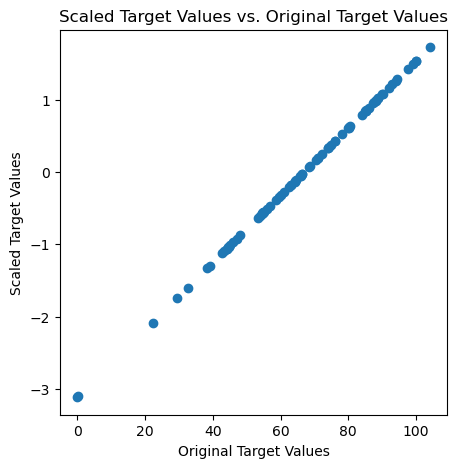

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Replace 'df' with actual DataFrame name

#Original Target
original_min_value = df['Target'].min()
original_max_value = df['Target'].max()


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
target = df_scaled['Target']
features = df_scaled.drop('Target', axis=1)



print("Original Target:")
print("Minimum value:", original_min_value)
print("Maximum value:", original_max_value)

# Scaled Target
scaled_min_value = df_scaled['Target'].min()
scaled_max_value = df_scaled['Target'].max()

print("\nScaled Target:")
print("Minimum value:", scaled_min_value)
print("Maximum value:", scaled_max_value)


# Plotting Scaled Target Values (y) vs. Original Target Values (x)
plt.figure(figsize=(5, 5))
plt.scatter(df['Target'], target)
plt.title('Scaled Target Values vs. Original Target Values')
plt.xlabel('Original Target Values')
plt.ylabel('Scaled Target Values')
plt.show()


In [12]:
#import pandas as pd

# from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df_scaled = df.copy()  # Create a copy of the original DataFrame

# Scale all columns except the target column
#columns_to_scale = df_scaled.columns.drop('Target')
#df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

#target = df_scaled['Target']
#features = df_scaled.drop('Target', axis=1)



Mean Train Accuracy: 0.915625
Mean Test Accuracy: 0.525
Mean Train Precision: 0.9234516351034296
Mean Test Precision: 0.6388108766233767
Mean Train Recall: 0.915625
Mean Test Recall: 0.525
Mean Train F1-score: 0.9171044700720646
Mean Test F1-score: 0.5194288277511961


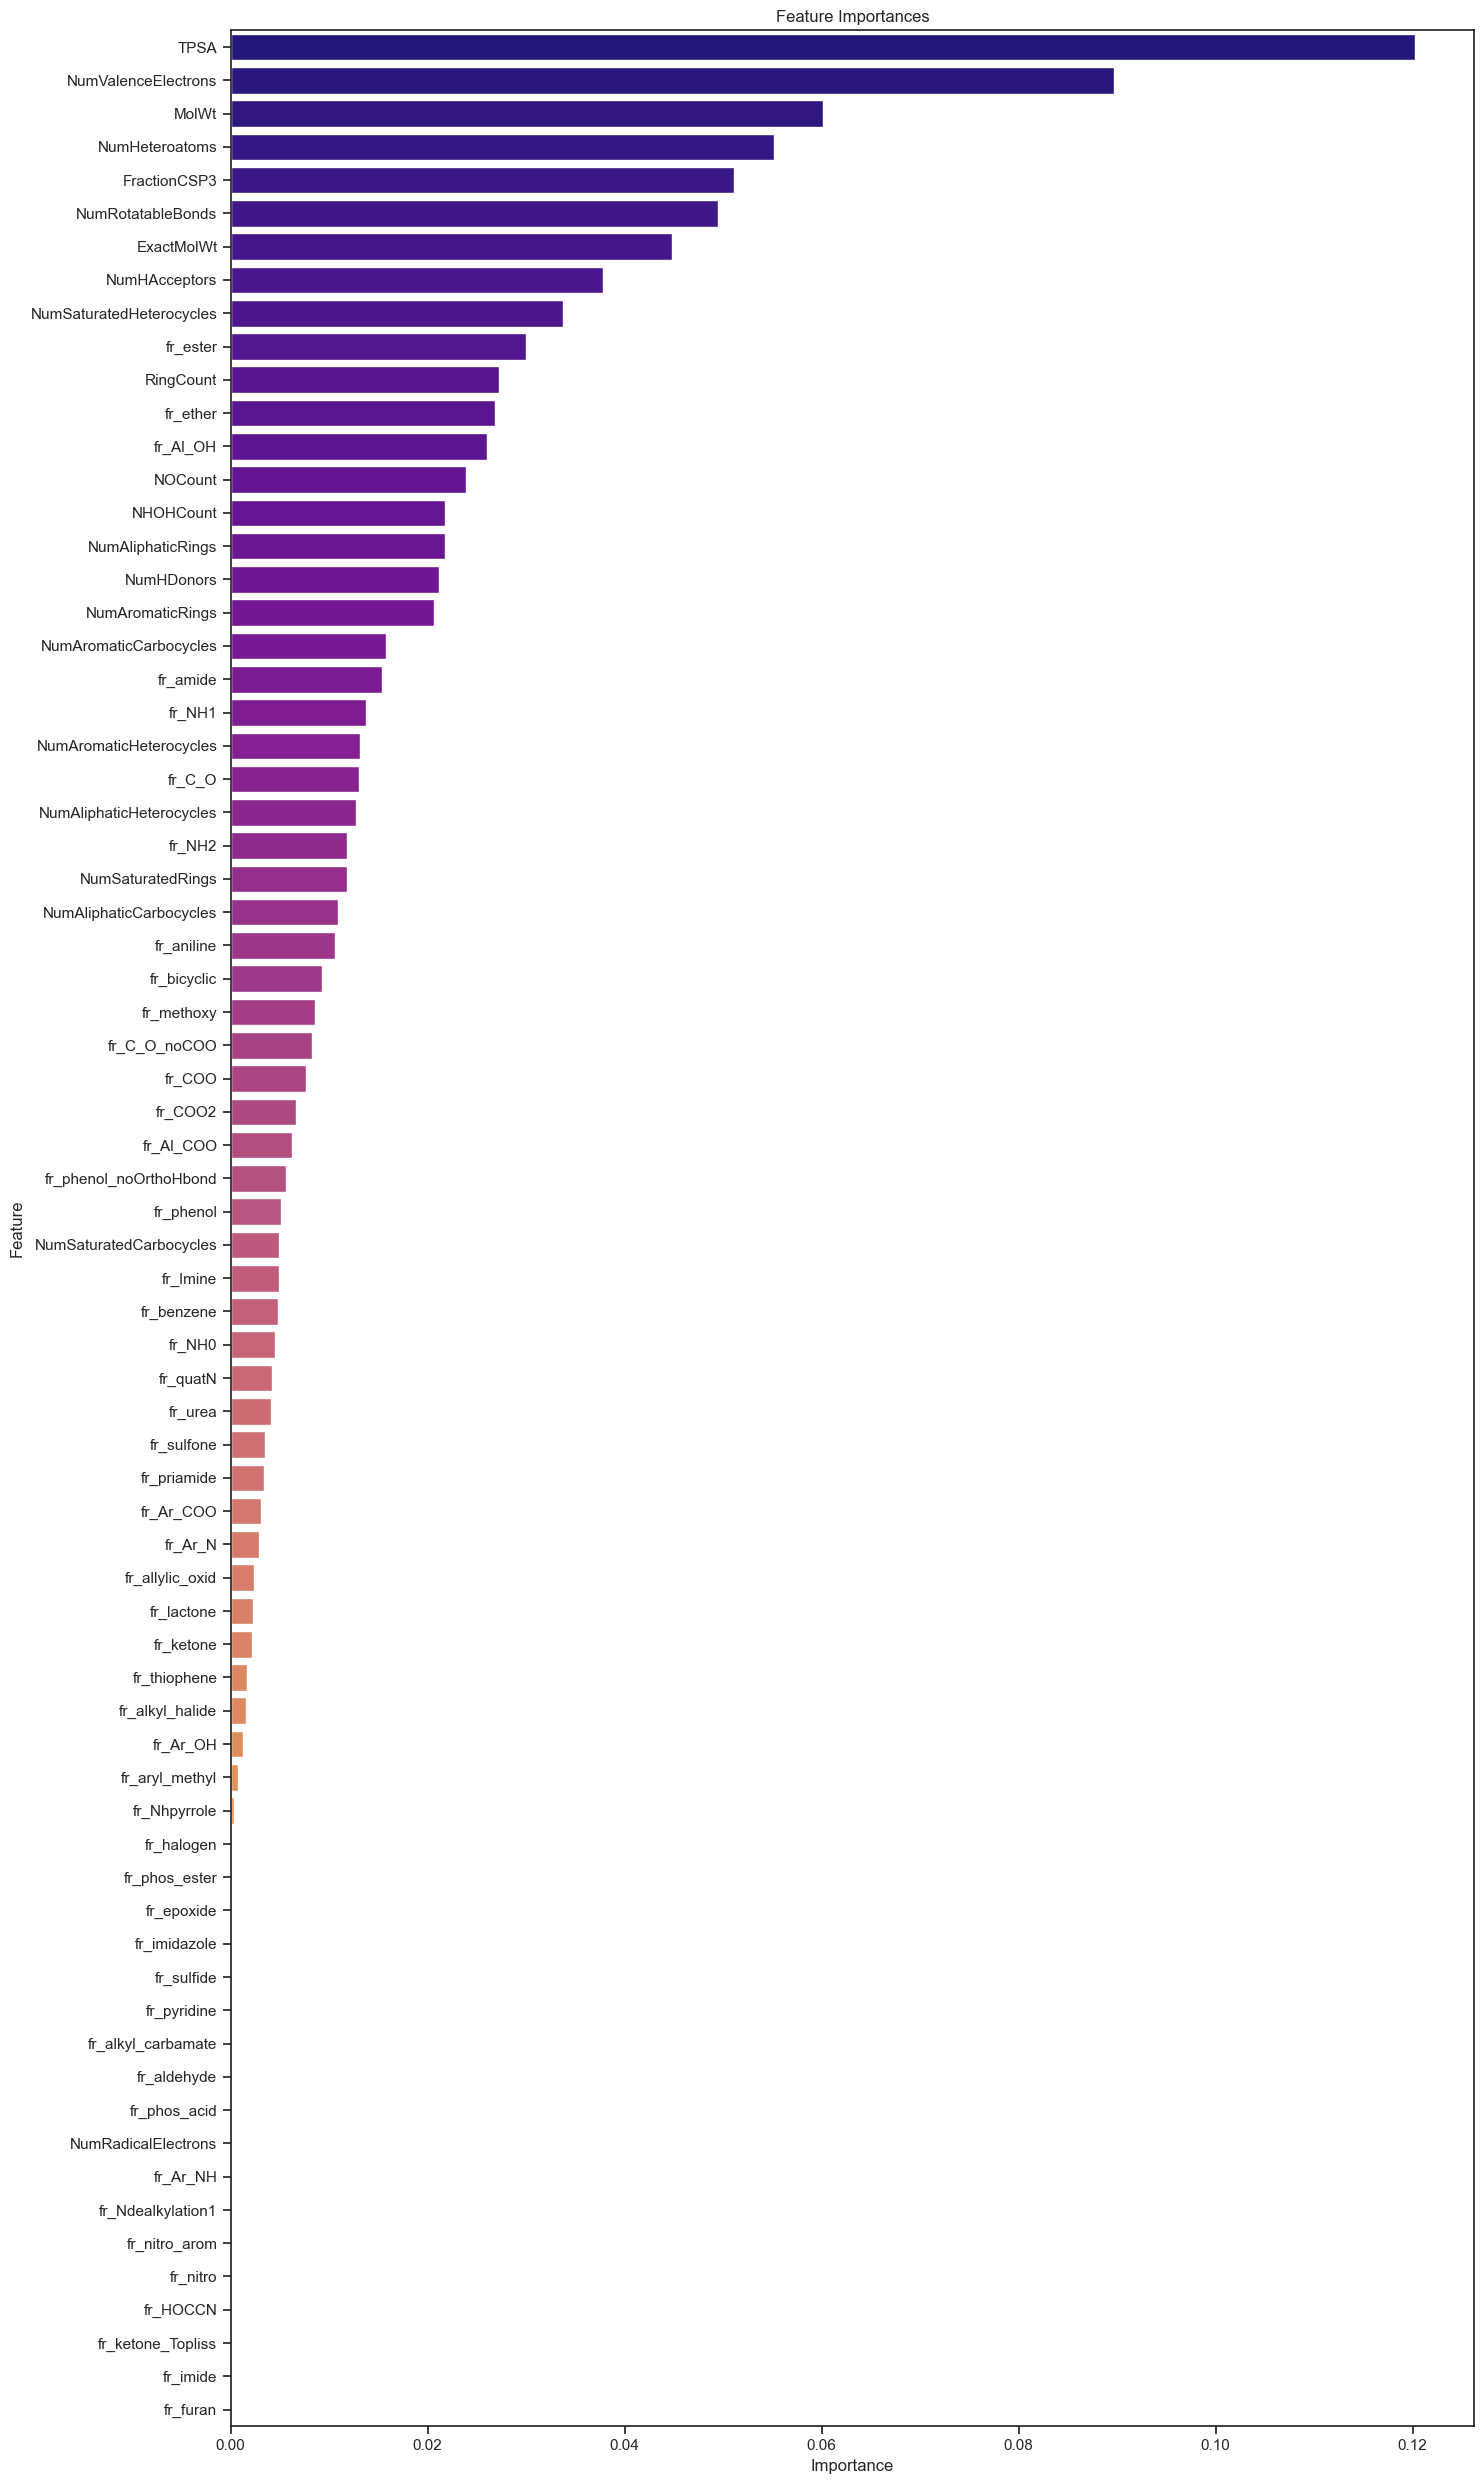

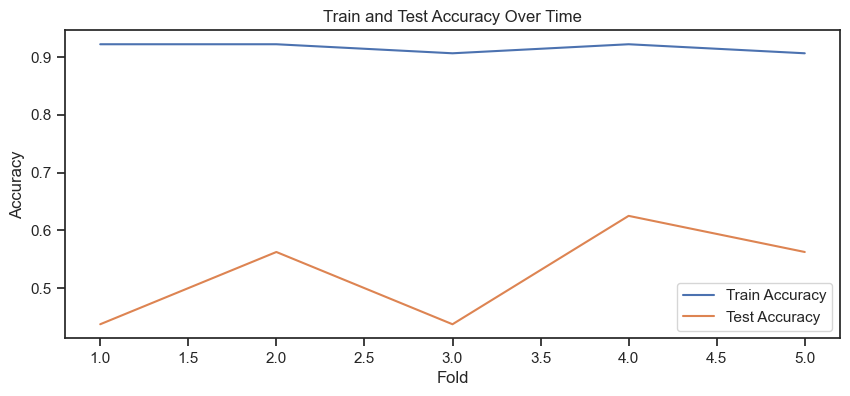

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
import random

# Set random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Define the thresholds for categorization
threshold_low = scaled_min_value + (scaled_max_value - scaled_min_value) / 3
threshold_good = scaled_min_value + 2 * (scaled_max_value - scaled_min_value) / 3

# Categorize targets into three classes
def categorize_target(value):
    if value < threshold_low:
        return 0  # low
    elif value < threshold_good:
        return 1  # good
    else:
        return 2  # perfect

# Apply categorization to the target values
df_scaled['Target_Categorized'] = df_scaled['Target'].apply(categorize_target)

# Encode the categorized target values
label_encoder = LabelEncoder()
categorized_targets_encoded = label_encoder.fit_transform(df_scaled['Target_Categorized'])

import csv
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert features and target to NumPy arrays
X = features.values
y = categorized_targets_encoded
feature_names = features.columns

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=5, random_state=42)

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation scores for each fold
accuracy_scores_train = []   # Train accuracy scores
accuracy_scores_test = []    # Test accuracy scores
precision_scores_train = []  # Train precision scores
precision_scores_test = []   # Test precision scores
recall_scores_train = []     # Train recall scores
recall_scores_test = []      # Test recall scores
f1_scores_train = []         # Train F1-scores
f1_scores_test = []          # Test F1-scores
# Lists to store accuracy over time
train_accuracy_over_time = []
test_accuracy_over_time = []

# Lists to store feature importances
feature_importance_list = []


# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate evaluation metrics for the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    # Calculate evaluation metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Store the evaluation scores for the current fold
    accuracy_scores_train.append(accuracy_train)
    accuracy_scores_test.append(accuracy_test)
    precision_scores_train.append(precision_train)
    precision_scores_test.append(precision_test)
    recall_scores_train.append(recall_train)
    recall_scores_test.append(recall_test)
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

    # Store the feature importances
    feature_importance_list.append(model.feature_importances_)
    # Store the accuracy over time
    train_accuracy_over_time.append(accuracy_train)
    test_accuracy_over_time.append(accuracy_test)


# Compute the mean evaluation scores across all folds
mean_accuracy_train = np.mean(accuracy_scores_train)
mean_accuracy_test = np.mean(accuracy_scores_test)
mean_precision_train = np.mean(precision_scores_train)
mean_precision_test = np.mean(precision_scores_test)
mean_recall_train = np.mean(recall_scores_train)
mean_recall_test = np.mean(recall_scores_test)
mean_f1_train = np.mean(f1_scores_train)
mean_f1_test = np.mean(f1_scores_test)

# Compute the mean feature importances across all folds
mean_feature_importances = np.mean(feature_importance_list, axis=0)
std_feature_importances = np.std(feature_importance_list, axis=0)
indices = np.argsort(mean_feature_importances)[::-1]

# Print the mean evaluation scores
print("Mean Train Accuracy:", mean_accuracy_train)
print("Mean Test Accuracy:", mean_accuracy_test)
print("Mean Train Precision:", mean_precision_train)
print("Mean Test Precision:", mean_precision_test)
print("Mean Train Recall:", mean_recall_train)
print("Mean Test Recall:", mean_recall_test)
print("Mean Train F1-score:", mean_f1_train)
print("Mean Test F1-score:", mean_f1_test)

# Plot the feature importances with feature names
plt.figure(figsize=(15, 25))
sns.barplot(x=mean_feature_importances[indices], y=feature_names[indices], palette='plasma')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Save feature importances to a CSV file
feature_importances_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': mean_feature_importances[indices]})
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances_df.to_csv('feature_importances_classification_RF.csv', index=False)

# Plot the train and test accuracy over time
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_folds + 1), train_accuracy_over_time, label='Train Accuracy')
plt.plot(range(1, num_folds + 1), test_accuracy_over_time, label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Over Time')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain predictions for the test set
y_pred = model.predict(X_test)

# Compute the probabilities for each class
y_pred_prob = y_pred / y_pred.sum(axis=1, keepdims=True)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['low', 'good', 'perfect']

# Compute the confusion matrix for train and test sets
cm_train = confusion_matrix(np.argmax(y_train, axis=1), y_pred_train, labels=range(len(class_labels)))
cm_test = confusion_matrix(np.argmax(y_test, axis=1), y_pred_test, labels=range(len(class_labels)))

# Create a figure and axes for the confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for train set
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Train")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot the confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - Test")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

  0%|          | 0/80 [00:00<?, ?it/s]

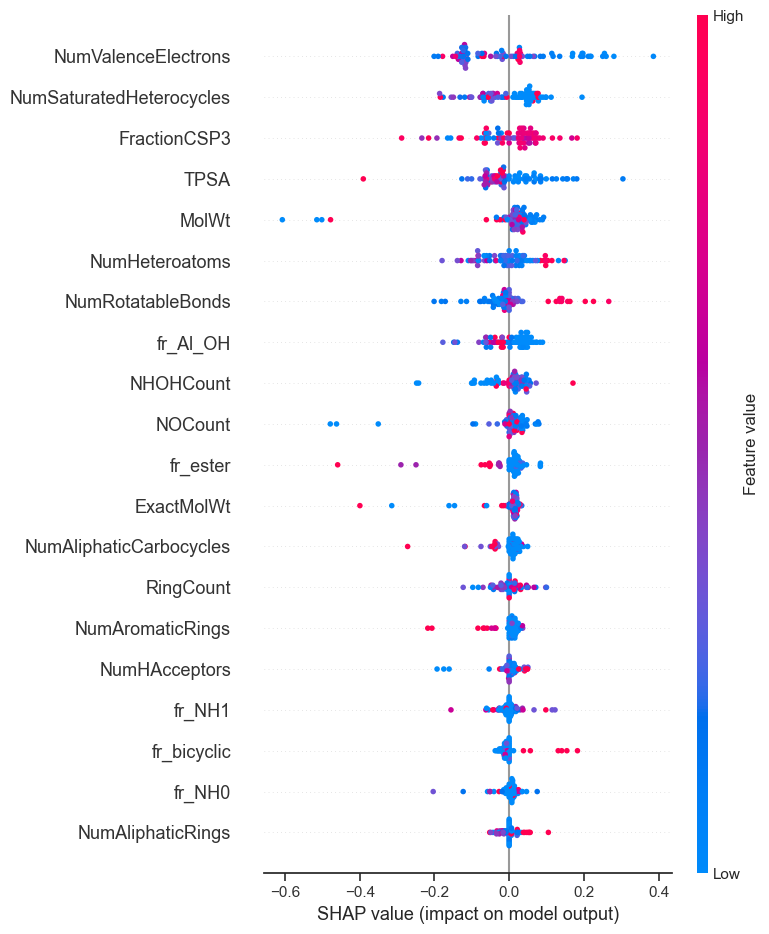

In [71]:
import shap
# Get SHAP values for the test set
explainer = shap.KernelExplainer(model.predict, X)
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X, feature_names=features.columns,  class_names=['low', 'good', 'perfect'])

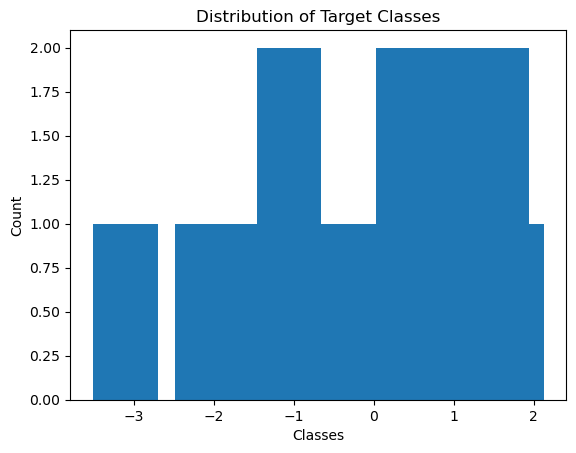

In [61]:
import matplotlib.pyplot as plt

# Assuming target variable is stored in a pandas Series called 'target'
# and it represents the classes of a classification problem

# Calculate the count of each class
class_counts = target.value_counts()

# Get the unique class labels
class_labels = class_counts.index.tolist()

# Create the bar plot
plt.bar(class_labels, class_counts)

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')

# Show the plot
plt.show()


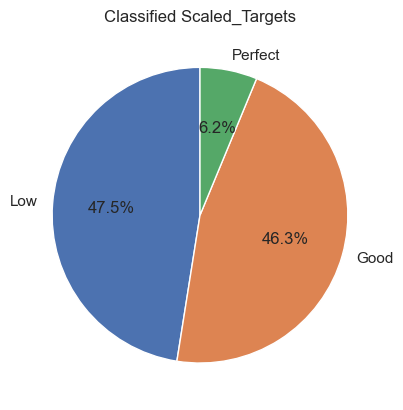

In [72]:
import matplotlib.pyplot as plt

# Calculate the count and percentage of each class
class_counts = target.value_counts()
class_percentages = class_counts / len(target) * 100

# Get the unique class labels
class_labels = class_counts.index.tolist()
import matplotlib.pyplot as plt

# Count the occurrences of each classified target
target_counts = df_scaled['Target_Categorized'].value_counts()

# Get the labels and sizes for the pie chart
labels = ['Low', 'Good', 'Perfect']
sizes = target_counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Classified Scaled_Targets')

# Display the pie chart
plt.show()



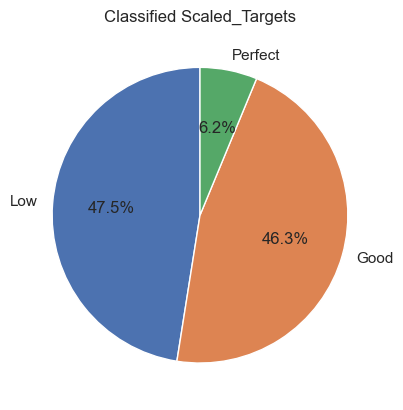

In [73]:
import matplotlib.pyplot as plt

# Calculate the count and percentage of each class
class_counts = target.value_counts()
class_percentages = class_counts / len(target) * 100

# Get the unique class labels
class_labels = class_counts.index.tolist()
import matplotlib.pyplot as plt

# Count the occurrences of each classified target
target_counts = df_scaled['Target_Categorized'].value_counts()

# Get the labels and sizes for the pie chart
labels = ['Low', 'Good', 'Perfect']
sizes = target_counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Classified Scaled_Targets')

# Display the pie chart
plt.show()



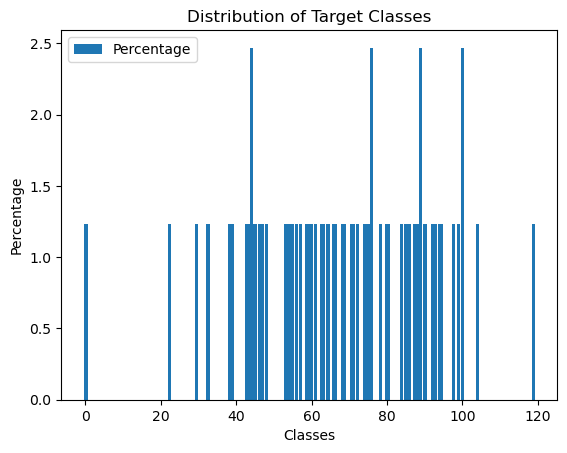

In [118]:
# Create the bar plot
plt.bar(class_labels, class_percentages)

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title('Distribution of Target Classes')

# Add legends
plt.legend(['Percentage'])

# Show the plot
plt.show()

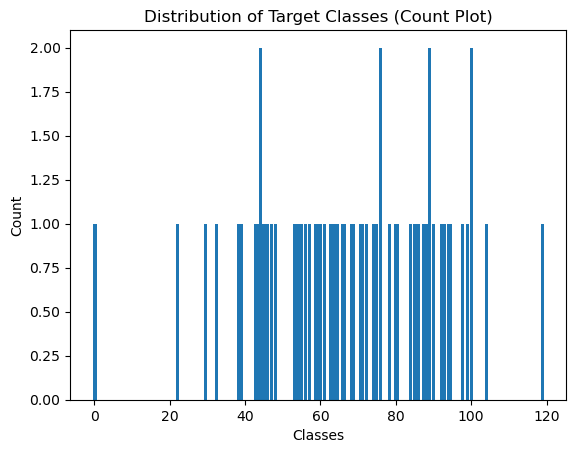

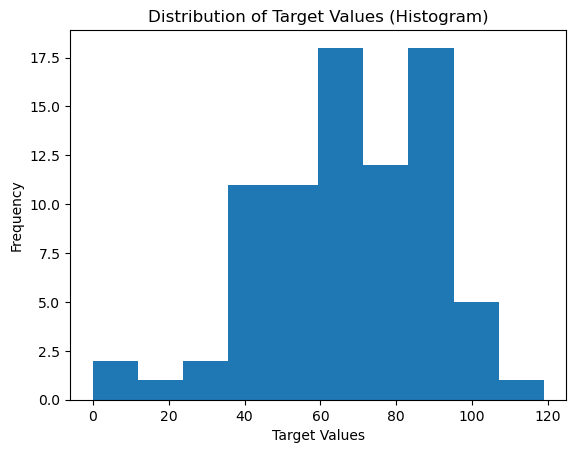

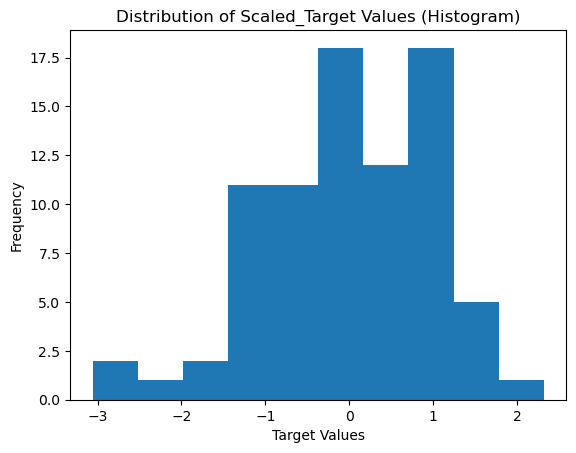

In [120]:
import matplotlib.pyplot as plt

# Count Plot
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Target Classes (Count Plot)')
plt.show()

# Histogram
plt.hist(df['Target'], bins=10)
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Distribution of Target Values (Histogram)')
plt.show()

# Histogram
plt.hist(target, bins=10)
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled_Target Values (Histogram)')
plt.show()


MemoryError: In RendererAgg: Out of memory

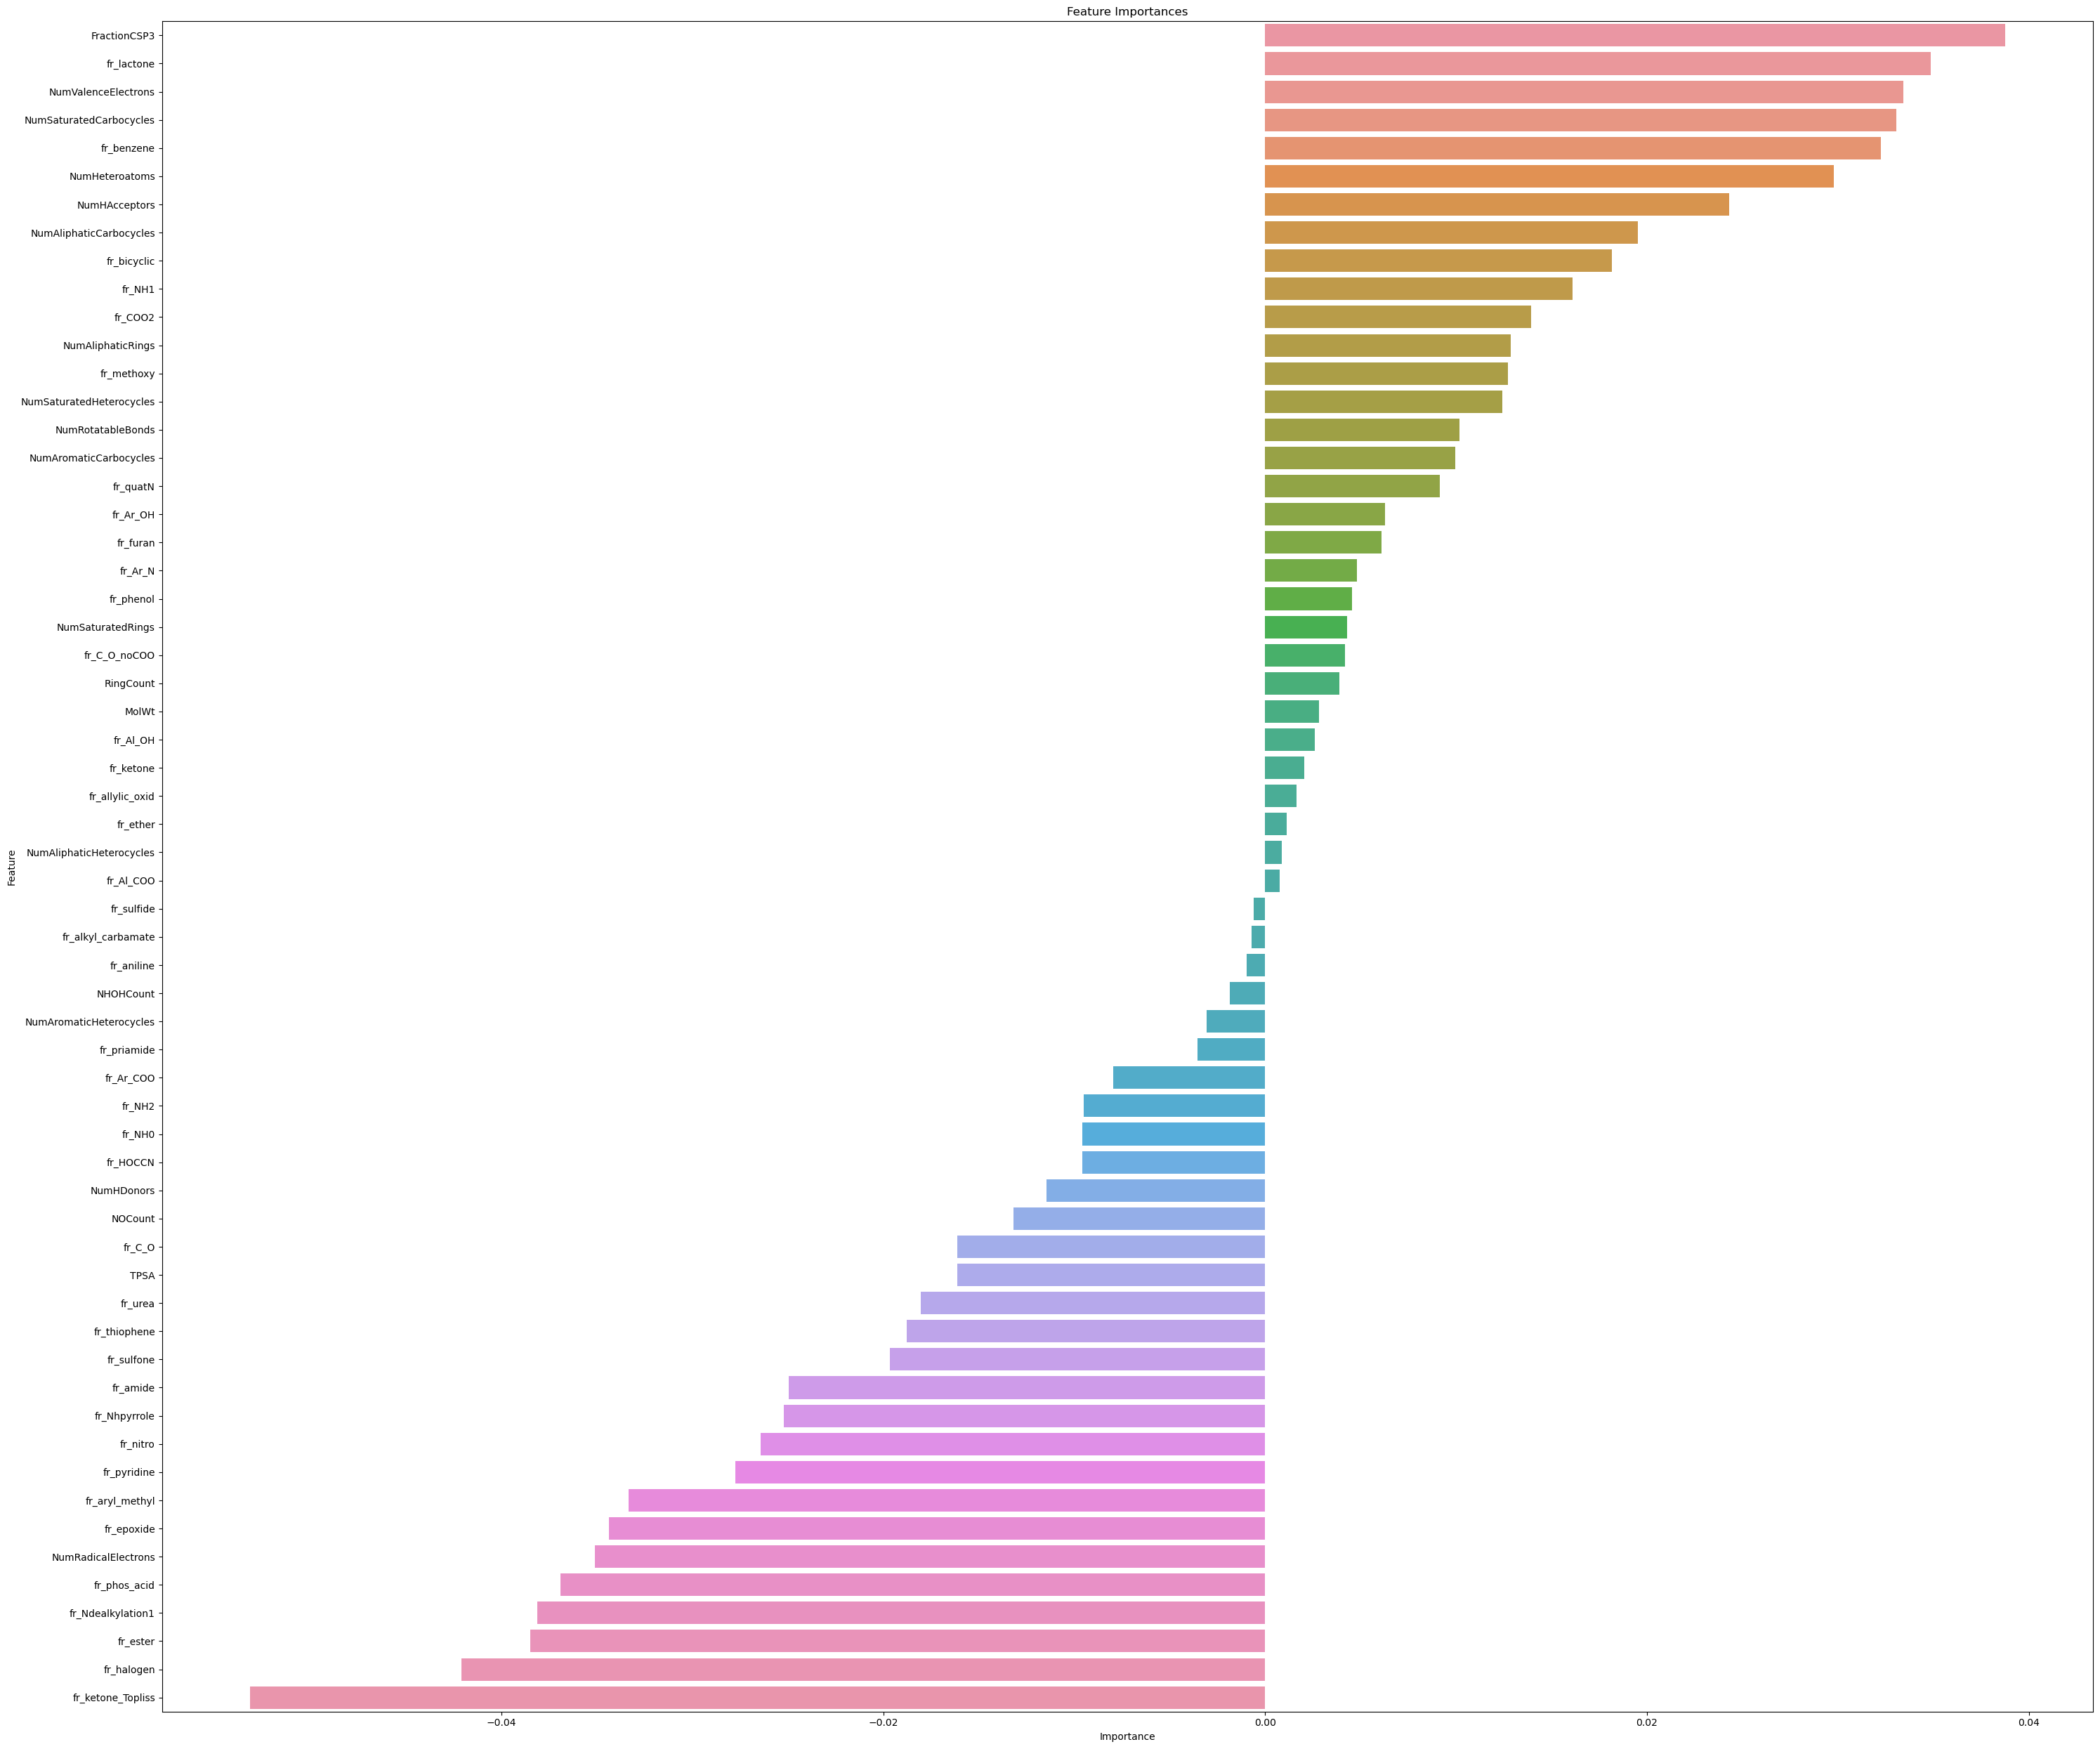

In [121]:
##### import seaborn as sns
##### import matplotlib.pyplot as plt
# Visualize feature importances using Seaborn

plt.figure(figsize=(30, 40))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
ax.tick_params(axis='y', labelsize=20)  # Set the font size for y-axis tick labels
ax.tick_params(axis='x', labelsize=20)
# Set the line space between y-axis tick labels
plt.yticks(fontsize=20, linespacing=5)  # You can adjust the fontsize and linespacing values as needed

plt.xlabel('Importance', fontsize=30)  # Set the font size for x-label
plt.ylabel('Feature', fontsize=30)     # Set the font size for y-label
plt.title('Feature Importances', fontsize=25)
plt.tight_layout()
plt.savefig('Feature Importances_Lasso_NN_5fold.png', dpi=2000, bbox_inches='tight')


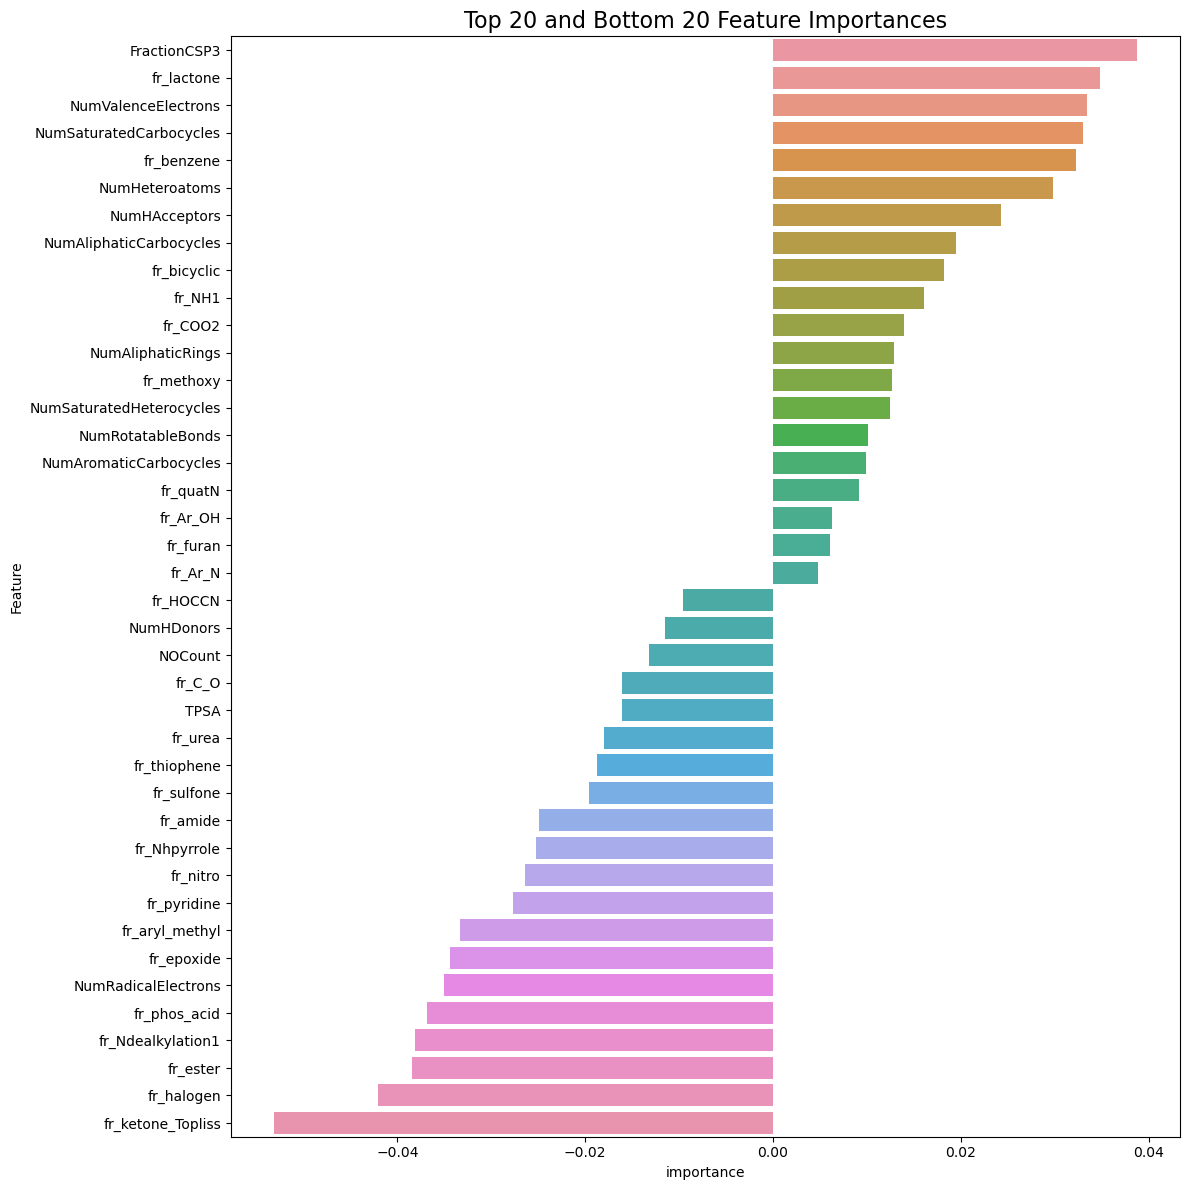

In [122]:
import seaborn as sns
# Select top 20 and bottom 20 features
top_20_features = feature_importances.head(20)
bottom_20_features = feature_importances.tail(20)

# Concatenate top and bottom features
selected_features = pd.concat([top_20_features, bottom_20_features])

# Visualize selected features using Seaborn
plt.figure(figsize=(12, 12))
sns.barplot(x='importance', y='feature', data=selected_features)
plt.ylabel('Feature', fontsize=10)
plt.title('Top 20 and Bottom 20 Feature Importances', fontsize=16)
plt.tight_layout()
plt.savefig('Top 20 and Bottom 20 Feature Importances_Lasso_NN_5fold.png', dpi=2000, bbox_inches='tight')

##### plt.show()

<Figure size 1000x1000 with 0 Axes>

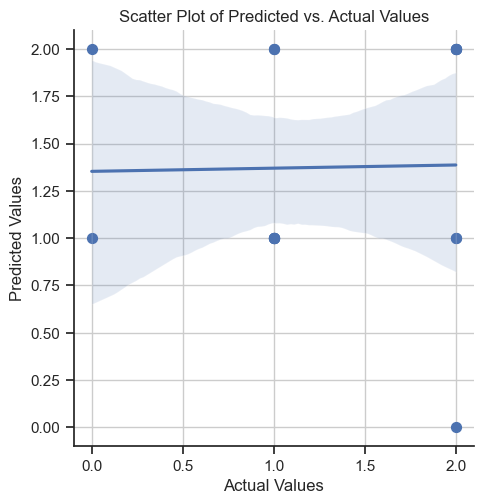

In [74]:
# Scatter plot of predicted values vs. actual values
y_pred = model.predict(X_test)
sns.set_theme(style="ticks")


# Create the scatter plot with linear regression line using seaborn
plt.figure(figsize=(10, 10))
sns.lmplot(x='Actual Values', y='Predicted Values', data=pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_pred.flatten()}), scatter_kws={"s": 50, "alpha": 1}, palette="muted")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()

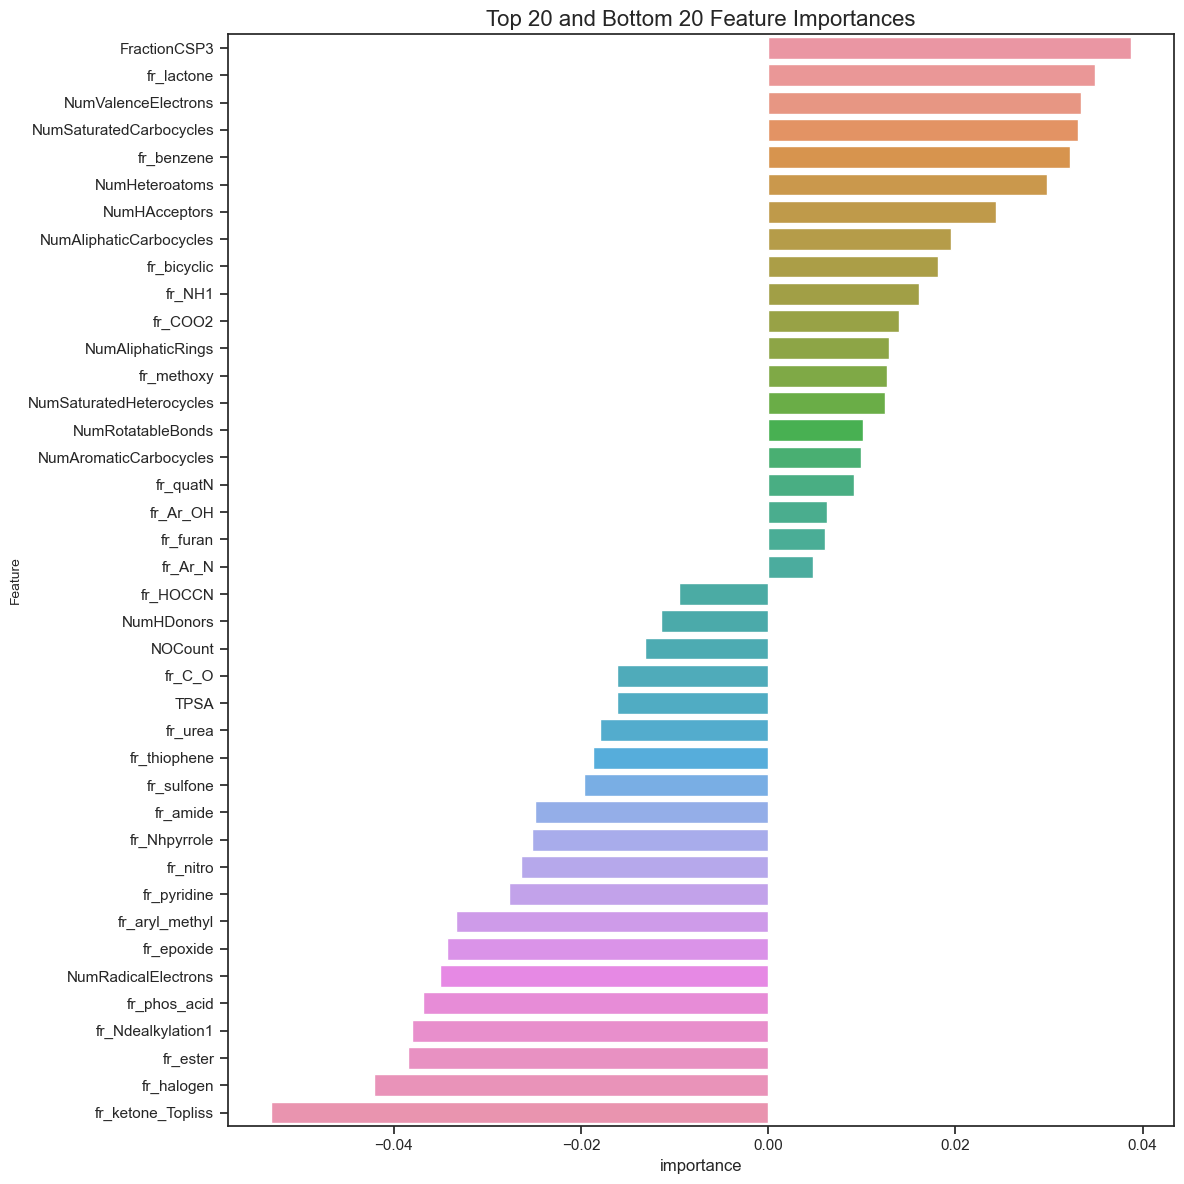

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the most correlated features with respect to electrical conductivity
corr_matrix = df.corr()  # Replace 'df' with actual dataframe
corr_with_conductivity = corr_matrix['electrical_conductivity'].abs()
highly_correlated_features = corr_with_conductivity[corr_with_conductivity >= 0.8].index

# Create the scatterplot with marginal histograms
sns.set(style='ticks')
scatterplot = sns.PairGrid(df[highly_correlated_features])
scatterplot.map_upper(plt.scatter, color='dodgerblue')
scatterplot.map_lower(sns.kdeplot, cmap='Blues_d')
scatterplot.map_diag(sns.histplot, color='dodgerblue')

# Set the labels and titles
scatterplot.fig.suptitle('Scatterplot with Marginal Histograms', fontsize=16)
plt.subplots_adjust(top=0.9)
scatterplot.set(xlabel='Feature', ylabel='Electrical Conductivity')

# Display the plot
plt.show()


In [75]:
# Plot the loss function over time
plt.plot(history.history['loss'])

# Add a title and labels
plt.title('Loss Function Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Show the plot
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'history'

MemoryError: In RendererAgg: Out of memory

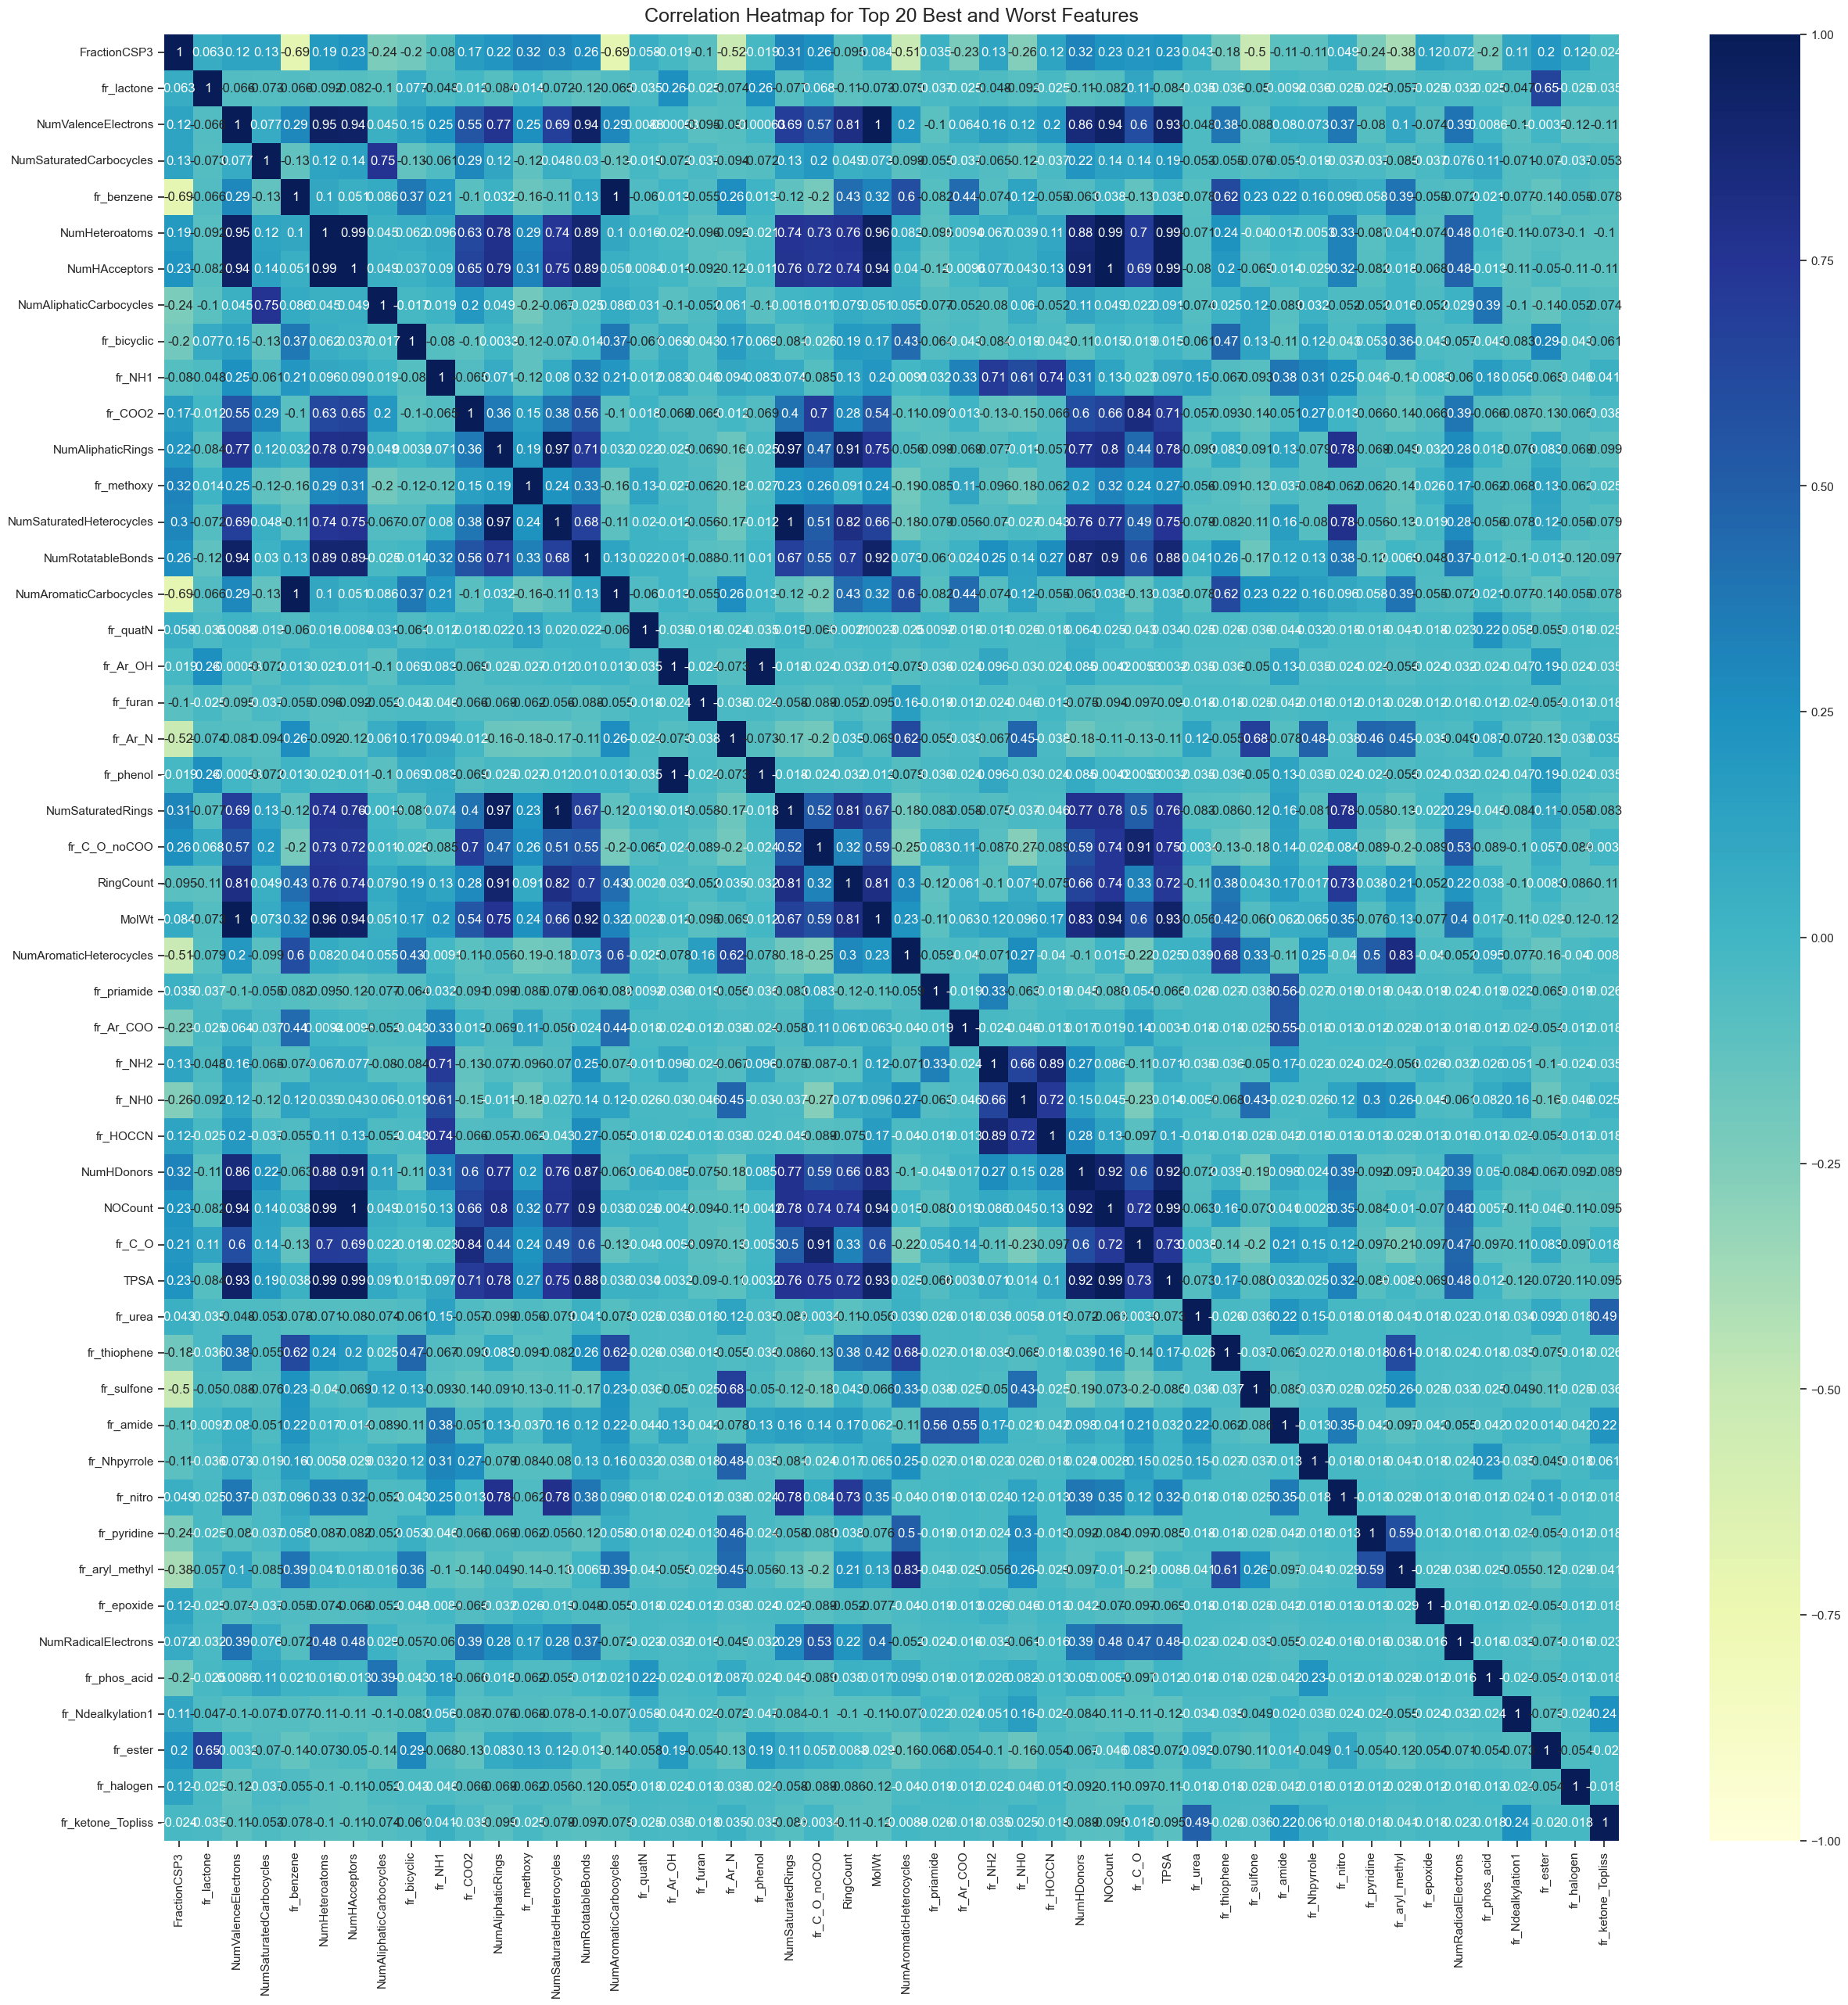

In [126]:
##### import seaborn as sns
##### import matplotlib.pyplot as plt

# Sort the feature_importances dataframe by importance in descending order
feature_importances_sorted = feature_importances.sort_values('importance', ascending=False)

# Get the names of the 20 best and 20 worst features
best_features = feature_importances_sorted.head(25)['feature']
worst_features = feature_importances_sorted.tail(25)['feature']

# Select only the relevant features from the original data
selected_features = pd.concat([df[best_features], df[worst_features]], axis=1)

# Create the correlation matrix for the selected features
corr_matrix = selected_features.corr()

# Set the figure size
plt.figure(figsize=(30, 30))

# Plot the correlation heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

# Set the title of the heatmap
heatmap.set_title('Correlation Heatmap for Top 20 Best and Worst Features', fontdict={'fontsize':18}, pad=12)

# Save the heatmap as a PNG file
plt.savefig('heatmap_Lasso_NN_5fold.png', dpi=2000, bbox_inches='tight')

# Display the heatmap
##### plt.show()


In [127]:
# Compute the correlation matrix for the subset DataFrame
correlation_matrix = df.corr()

# Find highly correlated features
threshold = 0.85  # Define a threshold for correlation coefficient
highly_correlated_features = set()  # Set to store the highly correlated feature pairs

for i in range(len(df.corr().columns)):
    for j in range(i):
        if abs(df.corr().iloc[i, j]) > threshold:
            col_i = df.corr().columns[i]
            col_j = df.corr().columns[j]
            highly_correlated_features.add((col_i, col_j))

# Print the highly correlated feature pairs
print("Highly Correlated Features:")
for features in highly_correlated_features:
    print(features)

Highly Correlated Features:
('ExactMolWt', 'NumHeteroatoms')
('NumSaturatedRings', 'NumAliphaticRings')
('TPSA', 'NOCount')
('fr_ether', 'fr_Al_OH')
('RingCount', 'NumAliphaticHeterocycles')
('fr_halogen', 'fr_alkyl_halide')
('MolWt', 'NumHAcceptors')
('TPSA', 'NumHeteroatoms')
('NumHAcceptors', 'NOCount')
('ExactMolWt', 'NumValenceElectrons')
('ExactMolWt', 'MolWt')
('NumHeteroatoms', 'NumHDonors')
('fr_imidazole', 'fr_Nhpyrrole')
('MolWt', 'NumRotatableBonds')
('fr_Al_OH', 'NOCount')
('fr_Nhpyrrole', 'fr_Ar_NH')
('NumSaturatedHeterocycles', 'NumAliphaticRings')
('NumValenceElectrons', 'NumHAcceptors')
('TPSA', 'NumValenceElectrons')
('TPSA', 'MolWt')
('fr_C_O_noCOO', 'fr_C_O')
('fr_benzene', 'NumAromaticRings')
('fr_Al_OH', 'NumHeteroatoms')
('NumValenceElectrons', 'NumRotatableBonds')
('NumSaturatedRings', 'NumAliphaticHeterocycles')
('NumRotatableBonds', 'NumHDonors')
('fr_benzene', 'NumAromaticCarbocycles')
('fr_phenol', 'fr_Ar_OH')
('NumHeteroatoms', 'NumHAcceptors')
('MolWt', 'N

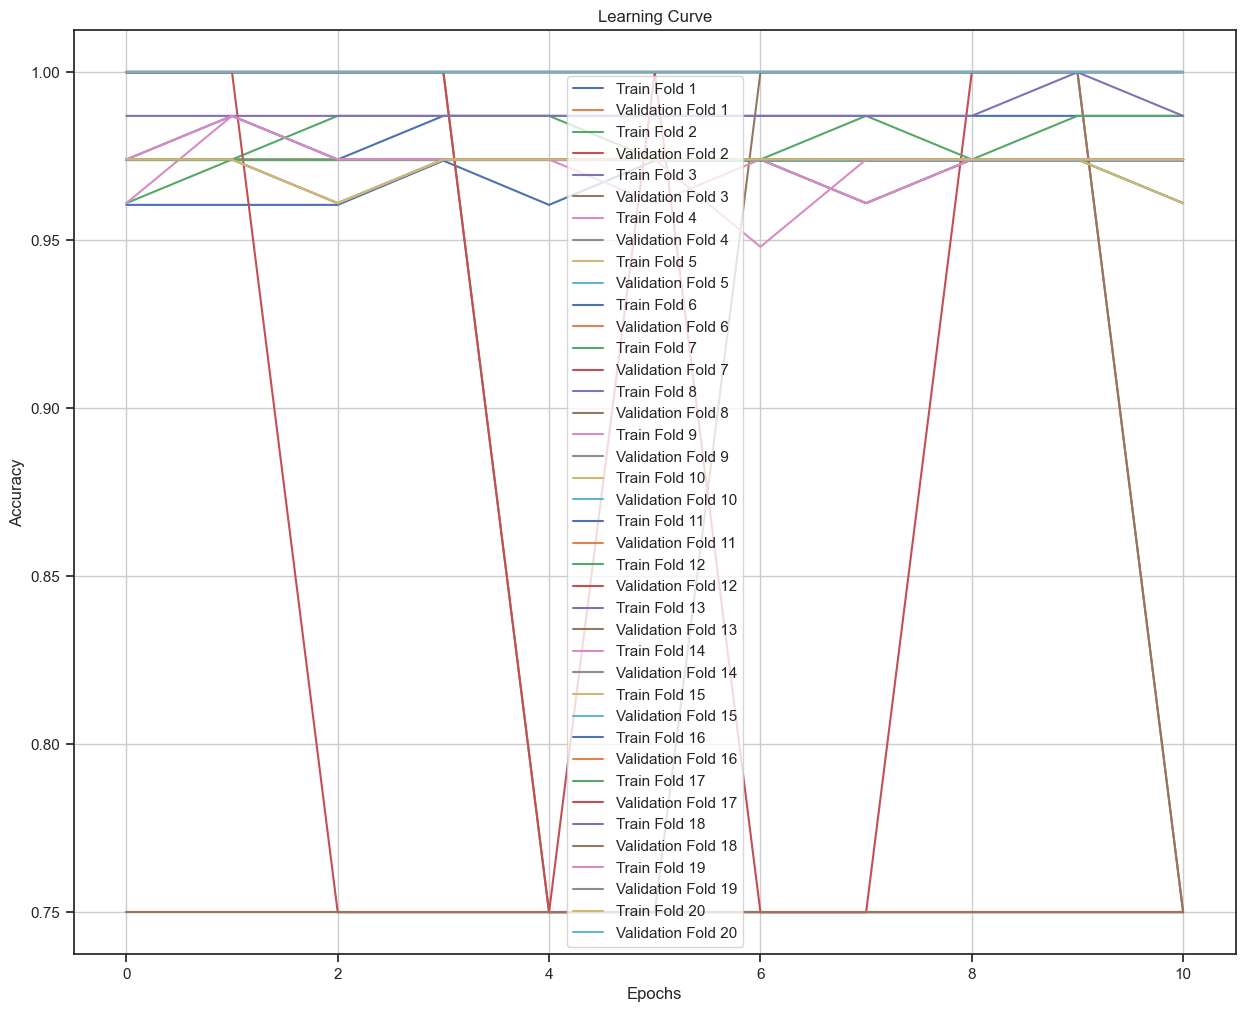

In [128]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Learning Curve
plt.figure(figsize=(15, 12))
train_accuracies = []
val_accuracies = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y_encoded[train_index], y_encoded[test_index]

    history = model.fit(X_train, y_train, epochs=45, batch_size=12, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])

    plt.plot(history.history['accuracy'], label='Train Fold {}'.format(i+1))
    plt.plot(history.history['val_accuracy'], label='Validation Fold {}'.format(i+1))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()




1/1 [==============================] - 0s 44ms/step


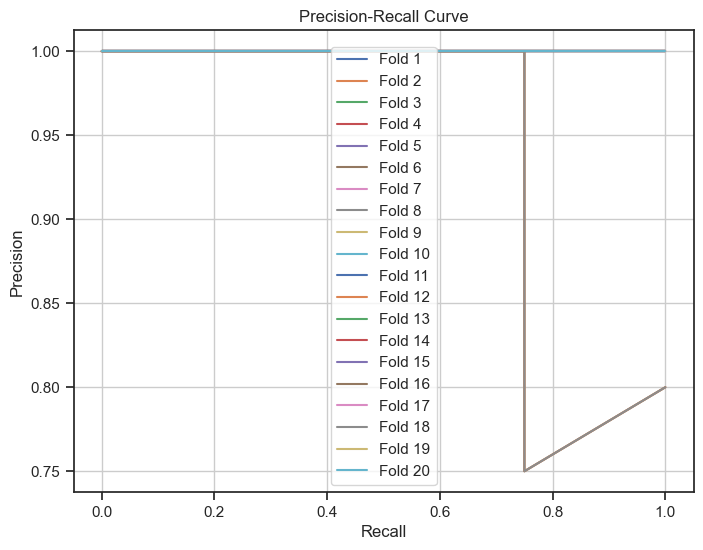

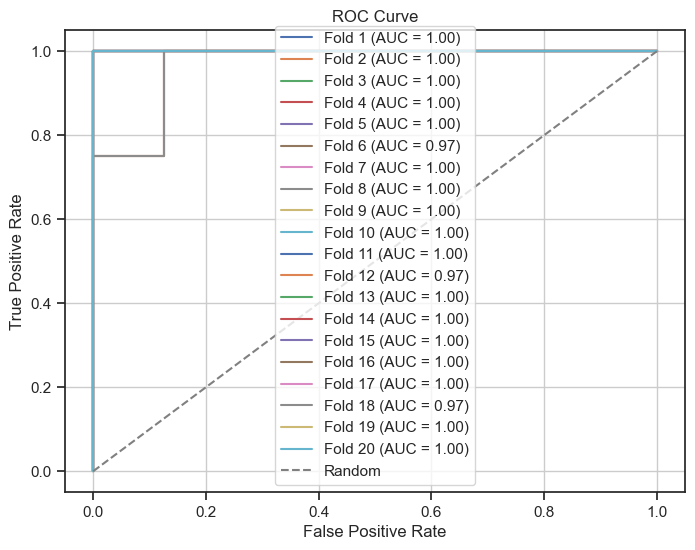

In [129]:
from sklearn.preprocessing import label_binarize

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
y_probs = []
y_tests = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y_encoded[train_index], y_encoded[test_index]

    model.fit(X_train, y_train, epochs=45, batch_size=12, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    y_prob = model.predict(X_val)
    y_probs.append(y_prob)
    y_tests.append(y_val)

    # Binarize true labels
    y_val_binarized = label_binarize(y_val, classes=[0, 1, 2])  # Adjust the classes according to target labels

    precision, recall, _ = precision_recall_curve(y_val_binarized.ravel(), y_prob.ravel())
    plt.plot(recall, precision, label='Fold {}'.format(i+1))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
for i, (y_prob, y_test) in enumerate(zip(y_probs, y_tests)):
    # Binarize true labels
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to target labels

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Fold {} (AUC = {:.2f})'.format(i+1, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


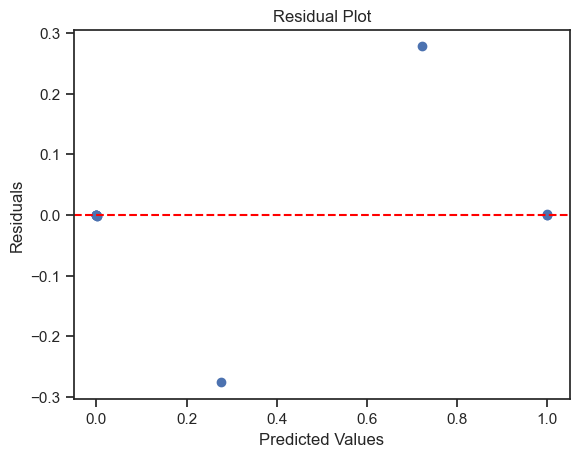

In [130]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


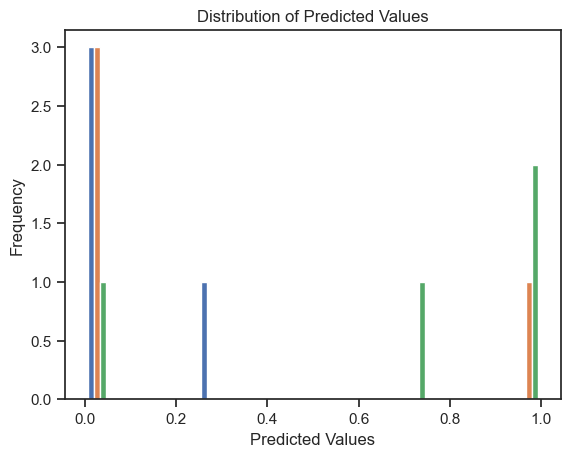

In [131]:
# Create a distribution plot
plt.hist(y_pred, bins=20)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


In [132]:
# Assuming you have a DataFrame with multiple variables
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E78551ECA0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Create a distribution plot
plt.hist(y_pred, bins=20)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate permutation feature importances
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1234)

# Get the feature importances
importances = result.importances_mean

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sort the feature importances by importance value
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importances')
plt.show()


In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#47519f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred , target_names=target_names ))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the most correlated features with respect to electrical conductivity
corr_matrix = df.corr()  # Replace 'df' with actual dataframe
corr_with_conductivity = corr_matrix['electrical_conductivity'].abs()
highly_correlated_features = corr_with_conductivity[corr_with_conductivity >= 0.8].index

# Create the scatterplot with marginal histograms
sns.set(style='ticks')
scatterplot = sns.PairGrid(df[highly_correlated_features])
scatterplot.map_upper(plt.scatter, color='dodgerblue')
scatterplot.map_lower(sns.kdeplot, cmap='Blues_d')
scatterplot.map_diag(sns.histplot, color='dodgerblue')

# Set the labels and titles
scatterplot.fig.suptitle('Scatterplot with Marginal Histograms', fontsize=16)
plt.subplots_adjust(top=0.9)
scatterplot.set(xlabel='Feature', ylabel='Electrical Conductivity')

# Display the plot
plt.show()
